In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

In [3]:
df_agility = pd.read_csv("./data/6_DATA_AGILITY.csv")

In [4]:
df_agility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32611 entries, 0 to 32610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indice             32611 non-null  int64  
 1   Index_data         32611 non-null  int64  
 2   Fecha              32611 non-null  object 
 3   License            32611 non-null  object 
 4   Breed              32611 non-null  object 
 5   Gender             32611 non-null  object 
 6   Hight_cm           32611 non-null  float64
 7   Classification     32611 non-null  object 
 8   Speed              32611 non-null  object 
 9   Time               32611 non-null  object 
 10  Faults             32611 non-null  object 
 11  Refusals           32611 non-null  object 
 12  Competition        32611 non-null  object 
 13  Location           32611 non-null  object 
 14  Roof               32611 non-null  object 
 15  Floor              32611 non-null  object 
 16  Eliminados         326

### Hipotesis 1.1: Los perros de raza border collie no ganan más que los perros de otras razas.

In [5]:
df_agility.groupby(df_agility["Breed"] == "Border Collie")["Classification"].value_counts()

Breed  Classification
False  1º                10977
       -                  6581
       2º                 2455
       3º                  769
       4º                  328
       5º                   84
       6º                   63
       8º                   19
       7º                   16
       10º                   2
       9º                    2
       11º                   1
True   1º                 5597
       -                  2831
       2º                 1705
       3º                  649
       4º                  305
       5º                  111
       6º                   65
       7º                   26
       8º                   17
       10º                   4
       9º                    4
Name: count, dtype: int64

In [6]:
razas_20 = df_agility["Breed"].value_counts()[:20]
razas_20

Breed
Border Collie                             11314
Shetland Sheepdog                          4426
Mixed breed                                3043
Spanish Water Dog                          1815
Poodle                                     1631
English Cocker Spaniel                     1361
Jack Russell Terrier                       1123
Belgian Shepherd Dog                        865
Parson Russell Terrier                      694
Mudi                                        490
Continental Toy Spaniel                     484
Miniature Pinscher                          427
Schnauzer                                   413
Andalusian wine-cellar rat-hunting dog      313
German Spitz                                306
Mini American Shepherd                      290
Australian Kelpie                           246
Australian Shepherd                         205
Chihuahua                                   184
Pyrenean Sheepdog - Smooth Faced            166
Name: count, dtype: int64

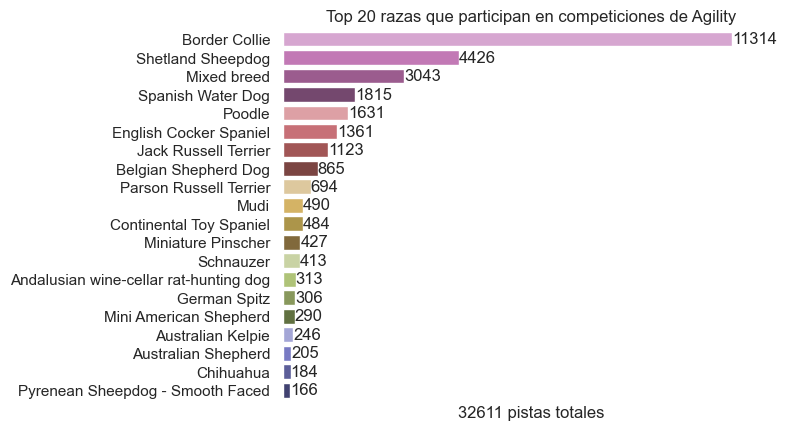

In [7]:
# de 32611 pistas, 11314 son realizadas por Border Collies.
sns.barplot(y= razas_20.index, x= razas_20.values, hue= razas_20.values, legend=False, palette= "tab20b")
plt.title("Top 20 razas que participan en competiciones de Agility")
plt.ylabel("")
plt.xlabel("32611 pistas totales")
plt.grid(False)
plt.xlim(0,12500)
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(razas_20):
    plt.text(valor, i, str(valor), ha='left', va='center')

#plt.savefig('./img/pistas_totales_por_razas.png', bbox_inches='tight')

In [8]:
razas_20_podium = pd.DataFrame(razas_20)
dic_podium = {
    "Primero":[],
    "Segundo":[],
    "Tercero":[]
}
for raza in razas_20_podium.index:
    podium_x_raza = df_agility.groupby(df_agility["Breed"] == raza)["Classification"].value_counts()
    for a,b in podium_x_raza.items():
        if a == (True, '1º'):
            dic_podium["Primero"].append(b)
        if a == (True, '2º'):
            dic_podium["Segundo"].append(b)
        if a == (True, '3º'):
            dic_podium["Tercero"].append(b)

# Los chiuauas no tienen podim en bronce (3ª)
df_agility.groupby(df_agility["Breed"] == "Chihuahua")["Classification"].value_counts()

Breed  Classification
False  1º                16460
       -                  9348
       2º                 4154
       3º                 1418
       4º                  633
       5º                  195
       6º                  128
       7º                   42
       8º                   36
       10º                   6
       9º                    6
       11º                   1
True   1º                  114
       -                    64
       2º                    6
Name: count, dtype: int64

In [9]:
dic_podium["Tercero"] = np.insert(dic_podium["Tercero"], 18, 0)

In [10]:
razas_20_podium["Primero"] = dic_podium["Primero"]
razas_20_podium["Segundo"] = dic_podium["Segundo"]
razas_20_podium["Tercero"] = dic_podium["Tercero"]
razas_20_podium["Suma_Podiums"] = razas_20_podium["Primero"] + razas_20_podium["Segundo"] + razas_20_podium["Tercero"]

In [11]:
razas_20_podium = razas_20_podium.sort_values(by="Suma_Podiums", ascending=False)

In [12]:
razas_20_podium["%Absoluto"] = razas_20_podium["Suma_Podiums"] / 32611 *100 
razas_20_podium["%Relativo"] = razas_20_podium["Suma_Podiums"] / razas_20_podium["count"] *100

In [13]:
razas_20_podium

,count,Primero,Segundo,Tercero,Suma_Podiums,%Absoluto,%Relativo
Breed,,,,,,,
Border Collie,11314,5597,1705,649,7951,24.381344,70.275765
Shetland Sheepdog,4426,2286,511,129,2926,8.972433,66.109354
Mixed breed,3043,1512,324,110,1946,5.967312,63.950049
Spanish Water Dog,1815,942,197,71,1210,3.710404,66.666667
Poodle,1631,891,217,40,1148,3.520285,70.386266
English Cocker Spaniel,1361,685,92,41,818,2.508356,60.102866
Jack Russell Terrier,1123,614,109,28,751,2.302904,66.874443
Belgian Shepherd Dog,865,434,132,58,624,1.913465,72.138728
Parson Russell Terrier,694,356,67,23,446,1.367637,64.265130


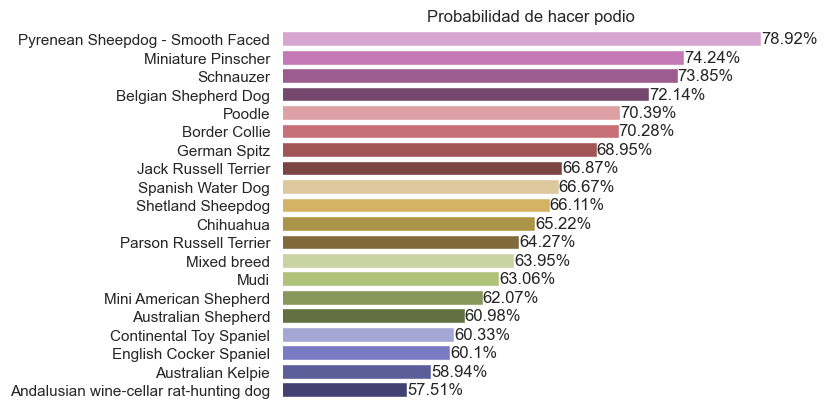

In [14]:
# En terminos relativos
podium_relativo = razas_20_podium.sort_values(by="%Relativo", ascending=False)

sns.barplot(y= podium_relativo.index, x= podium_relativo["%Relativo"], hue= podium_relativo["%Relativo"], legend=False, palette= "tab20b")
plt.title("Probabilidad de hacer podio")
plt.xlim(50,80)
sns.despine(left=True, bottom=True)
plt.ylabel("")
plt.xlabel("")
plt.xticks([])

for i, valor in enumerate(podium_relativo["%Relativo"]):
    plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

#plt.savefig('./img/podio_por_razas.png', bbox_inches='tight')

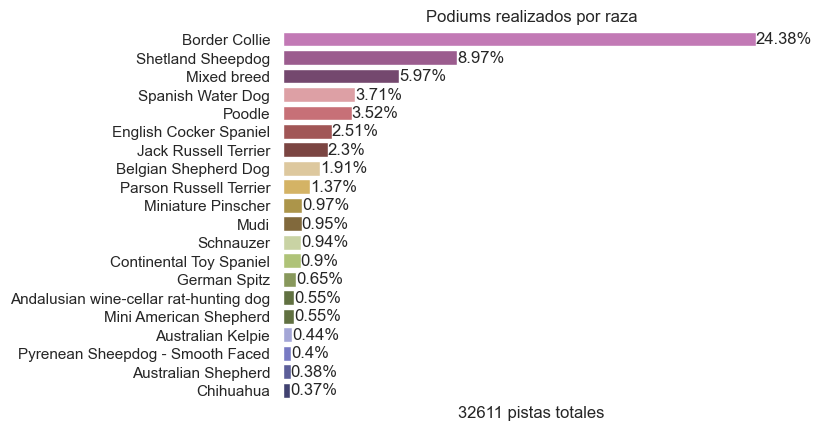

In [15]:
# En terminos absolutos
podium_absoluto = razas_20_podium.sort_values(by="%Absoluto", ascending=False)

sns.barplot(y= podium_absoluto.index, x= podium_absoluto["%Absoluto"], hue= podium_absoluto["%Absoluto"], legend=False, palette= "tab20b")
plt.xticks([])
sns.despine(left=True, bottom=True)
plt.ylabel("")
plt.title("Podiums realizados por raza")
plt.xlabel("32611 pistas totales")

for i, valor in enumerate(podium_absoluto["%Absoluto"]):
    plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

#plt.savefig('./img/podio_por_razas_absoluto.png', bbox_inches='tight')


In [16]:
dic_elim = {
    "pistas_a_0" : [],
    "eliminados" : []
}

for raza in razas_20_podium.index:
    elim_x_raza = df_agility.groupby(df_agility["Breed"] == raza)["Eliminados"].value_counts()
    for a,b in elim_x_raza.items():
        if a == (True, 'EXC_0'):
            dic_elim["pistas_a_0"].append(b)
        if a == (True, 'ELIM'):
            dic_elim["eliminados"].append(b)

In [17]:
razas_20_podium["pistas_a_0"] = dic_elim["pistas_a_0"]
razas_20_podium["eliminados"] = dic_elim["eliminados"]


In [18]:
razas_20_podium["%Pisats_a_0"] =  razas_20_podium["pistas_a_0"] / razas_20_podium["count"] *100
razas_20_podium["%eliminados"] =  razas_20_podium["eliminados"] / razas_20_podium["count"] *100

In [19]:
razas_20_podium
# % Pistas a cero y eliminados relativos

,count,Primero,Segundo,Tercero,Suma_Podiums,%Absoluto,%Relativo,pistas_a_0,eliminados,%Pisats_a_0,%eliminados
Breed,,,,,,,,,,,
Border Collie,11314,5597,1705,649,7951,24.381344,70.275765,4166,2728,36.821637,24.111720
Shetland Sheepdog,4426,2286,511,129,2926,8.972433,66.109354,1629,1376,36.805242,31.089019
Mixed breed,3043,1512,324,110,1946,5.967312,63.950049,901,950,29.608939,31.219192
Spanish Water Dog,1815,942,197,71,1210,3.710404,66.666667,684,523,37.685950,28.815427
Poodle,1631,891,217,40,1148,3.520285,70.386266,749,458,45.922747,28.080932
English Cocker Spaniel,1361,685,92,41,818,2.508356,60.102866,516,513,37.913299,37.692873
Jack Russell Terrier,1123,614,109,28,751,2.302904,66.874443,373,346,33.214604,30.810329
Belgian Shepherd Dog,865,434,132,58,624,1.913465,72.138728,264,192,30.520231,22.196532
Parson Russell Terrier,694,356,67,23,446,1.367637,64.265130,257,233,37.031700,33.573487


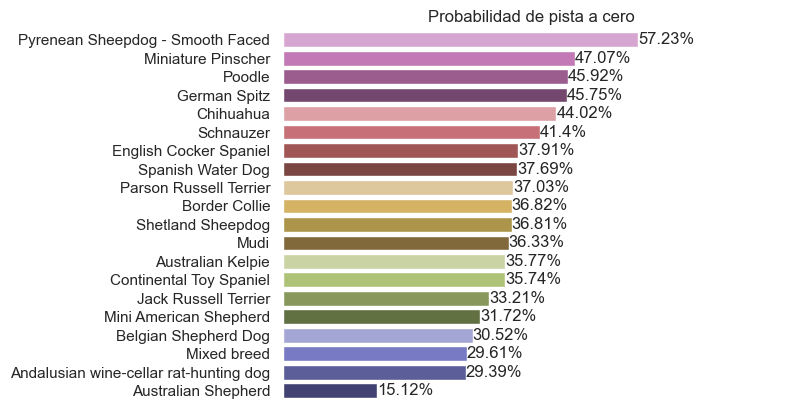

In [20]:
#SEGUIR ESTUDIANDO: Primeros - Suma podiums - pistas a 0 // Eliminados

a_cero_relativo = razas_20_podium.sort_values(by="%Pisats_a_0", ascending=False)

sns.barplot(y= a_cero_relativo.index, x= a_cero_relativo["%Pisats_a_0"], hue= a_cero_relativo["%Pisats_a_0"], legend=False, palette= "tab20b")
plt.xlim(0,80)
plt.title("Probabilidad de pista a cero")
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(a_cero_relativo["%Pisats_a_0"]):
    plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

#plt.savefig('./img/pista_a_0_razas.png', bbox_inches='tight')


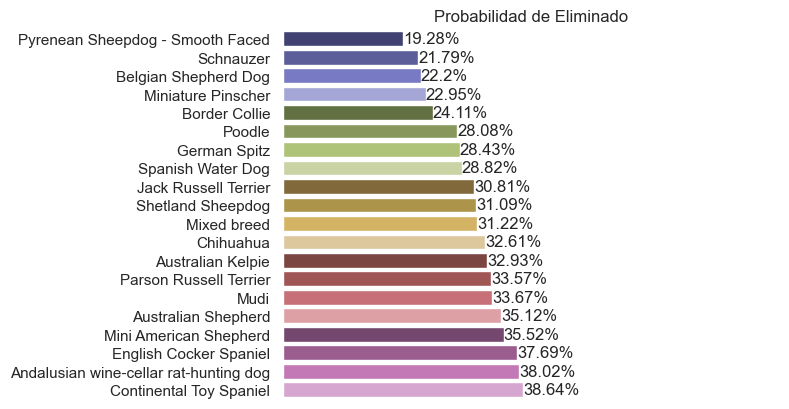

In [21]:
eliminados_relativo = razas_20_podium.sort_values(by="%eliminados", ascending=True)

sns.barplot(y= eliminados_relativo.index, x= eliminados_relativo["%eliminados"], hue= eliminados_relativo["%eliminados"], legend=False, palette= "tab20b")
plt.xlim(0,80)
plt.title("Probabilidad de Eliminado")
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(eliminados_relativo["%eliminados"]):
    plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

#plt.savefig('./img/eliminados_por_razas.png', bbox_inches='tight')

In [25]:
razas_20_podium.to_csv("./data/top20_razas_agility.csv")